<a href="https://colab.research.google.com/github/Jack1234475/CECS-457-Applied-ML/blob/main/HW3/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import Dataset,DataLoader
import torchvision.transforms as transforms
from  torchvision.datasets import ImageFolder
from torch.autograd import Variable
import cv2
import numpy as np
import os, random,sys


# Build an Autoencoder for a human face dataset

We will use a dataset containig images of people and train an autoencoder on it.

## Step 1

Download and unzip the ``lfw.zip`` file . Adjust the ``path`` variable so that it contains the address of the unzipped folder. We will create a dataloader from this folder.


In [3]:
#!unzip /lfw.zip
path = '/content/lfw/lfw'

The method I use to upload the data is uploading the zip file first. Then as shown in the commented line above, I unzipped it using that line. Then for the path line, I discovered that going to the first lfw folder, it would not read the path correctly in the next step due to the MACOXS folder. And so I figured I could open the path into the other lfw folder. Thus, step 2 was able to work properly

In [4]:
transform    = transforms.Compose([transforms.ToTensor()])
dataloader = DataLoader(ImageFolder(path, transform,),batch_size=32, shuffle=True)


This project is compute intensive. If you have a cuda or mps device on your laptop make sure you use that in the training.

In [5]:
if torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    print ("MPS device not found.")


MPS device not found.


torch.Size([250, 250, 3])


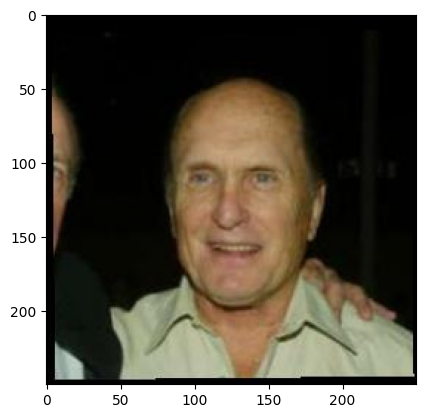

In [6]:
for x,y in dataloader:
    x = x[0].permute(1, 2, 0)
    print(x.shape)
    plt.imshow(x)
    break

## Step 2
Each datapoint is an image. Get a sample of the data and print its dimensions and explain what each dimension means.

torch.Size([250, 250, 3])


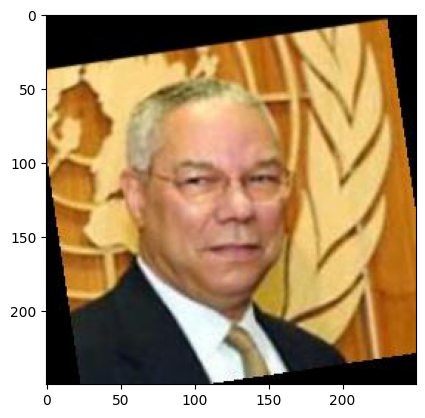

torch.Size([250, 250, 3])


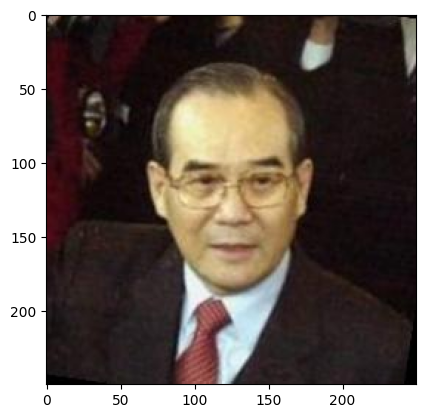

torch.Size([250, 250, 3])


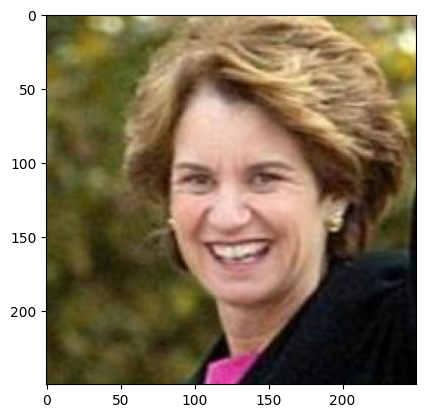

torch.Size([250, 250, 3])


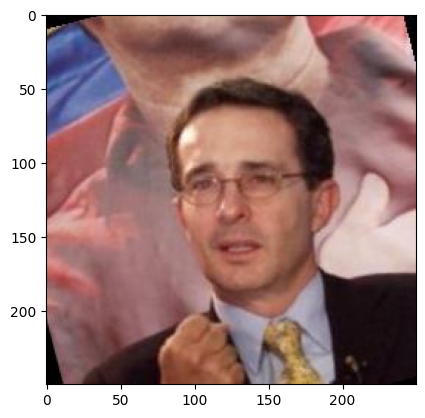

torch.Size([250, 250, 3])


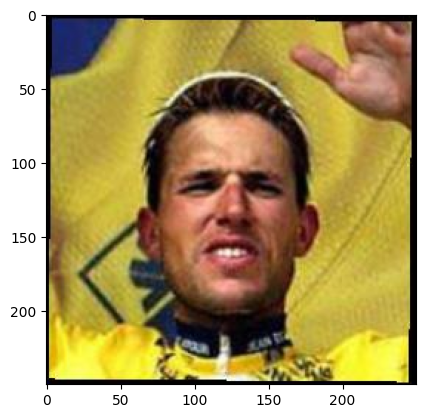

torch.Size([250, 250, 3])


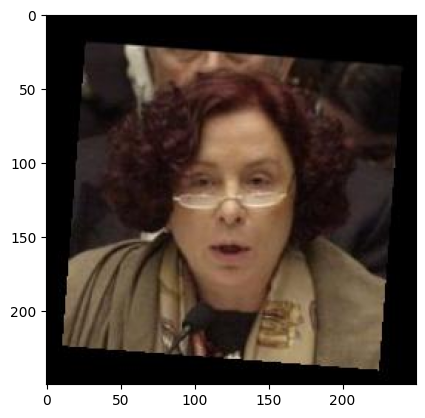

torch.Size([250, 250, 3])


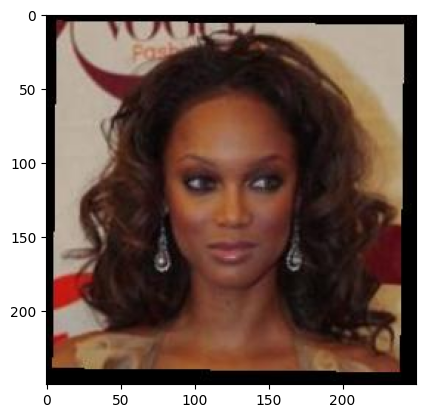

torch.Size([250, 250, 3])


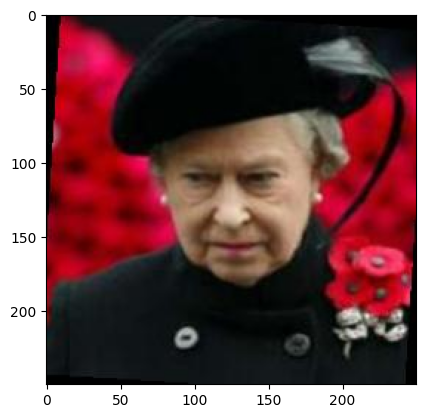

torch.Size([250, 250, 3])


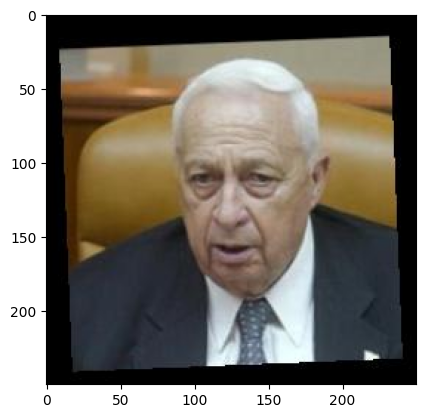

torch.Size([250, 250, 3])


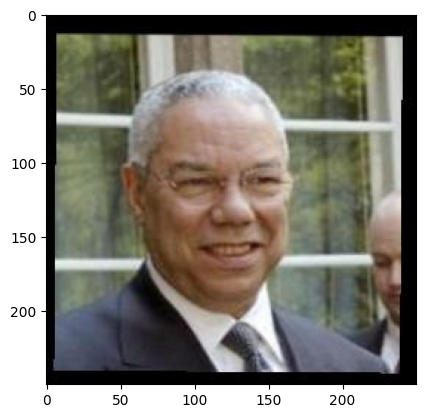

torch.Size([250, 250, 3])


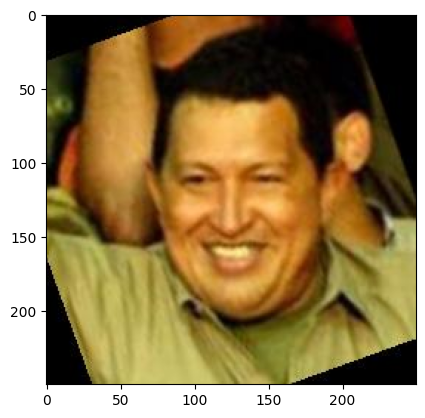

torch.Size([250, 250, 3])


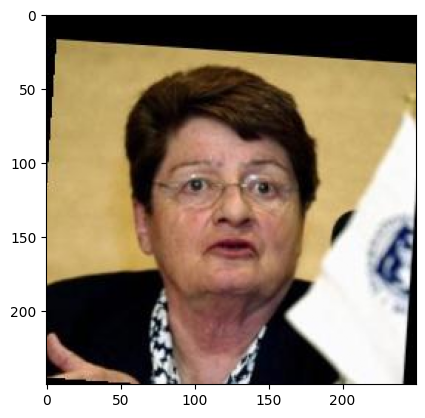

torch.Size([250, 250, 3])


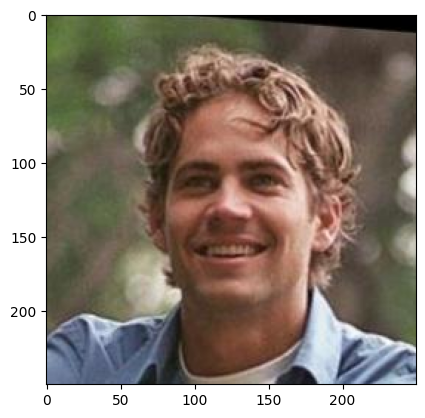

torch.Size([250, 250, 3])


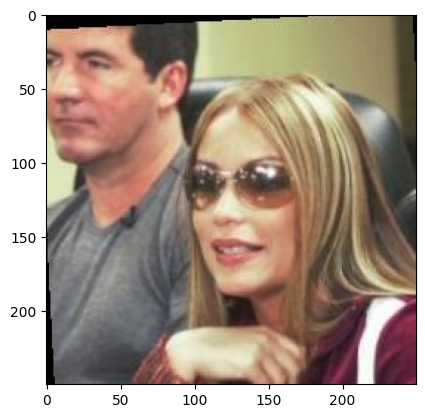

torch.Size([250, 250, 3])


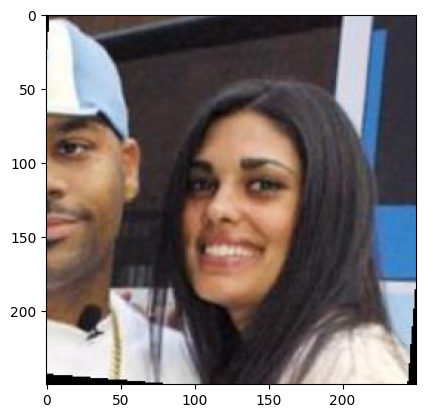

torch.Size([250, 250, 3])


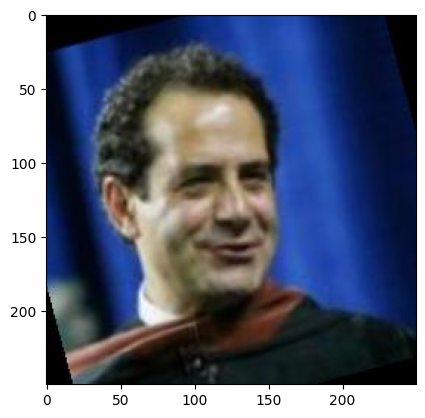

torch.Size([250, 250, 3])


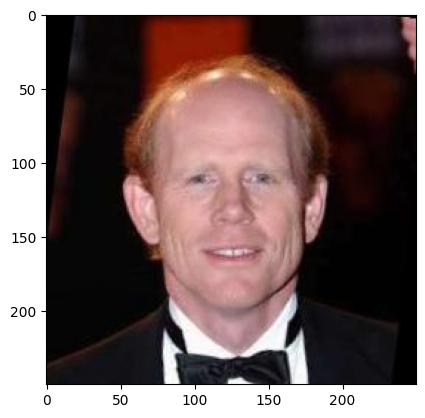

torch.Size([250, 250, 3])


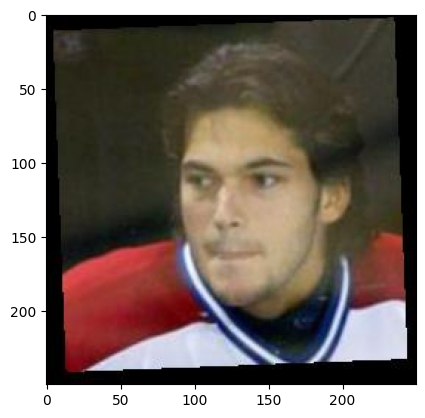

torch.Size([250, 250, 3])


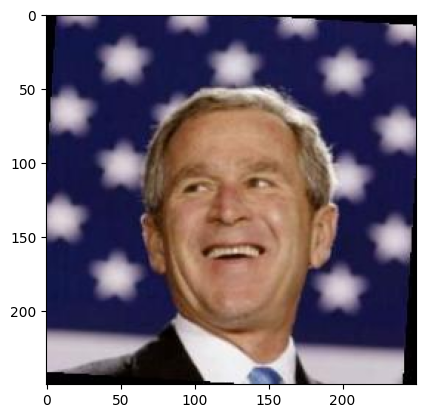

torch.Size([250, 250, 3])


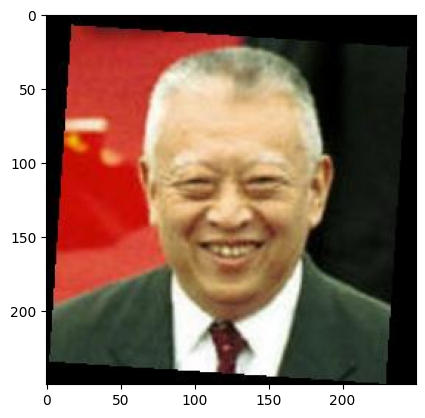

torch.Size([250, 250, 3])


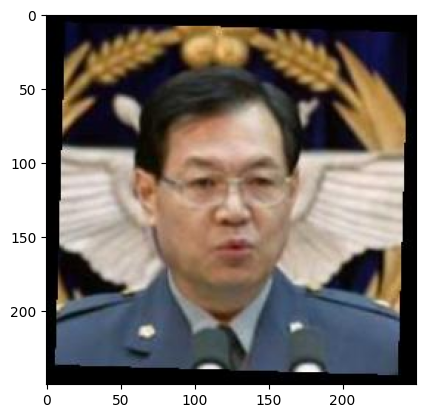

torch.Size([250, 250, 3])


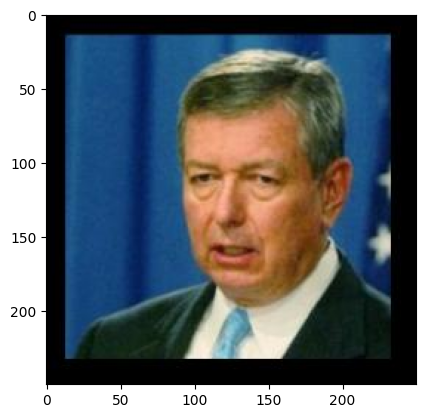

torch.Size([250, 250, 3])


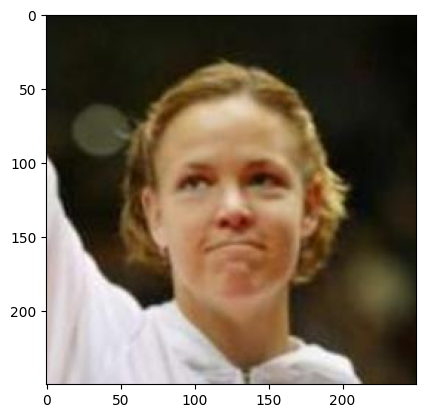

torch.Size([250, 250, 3])


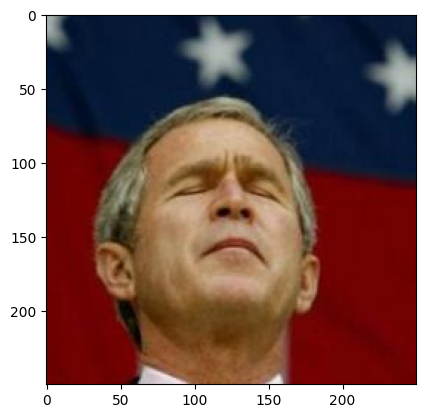

torch.Size([250, 250, 3])


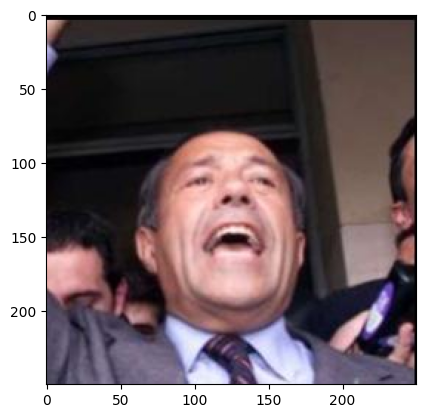

torch.Size([250, 250, 3])


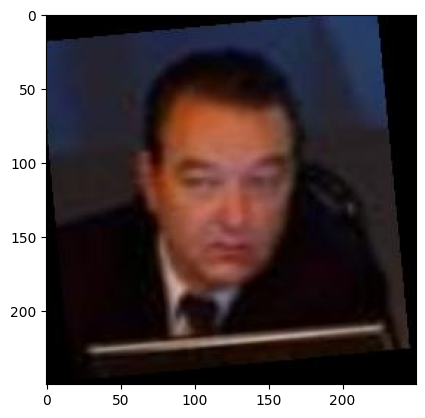

torch.Size([250, 250, 3])


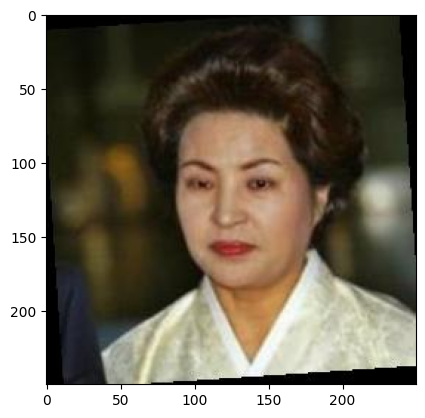

torch.Size([250, 250, 3])


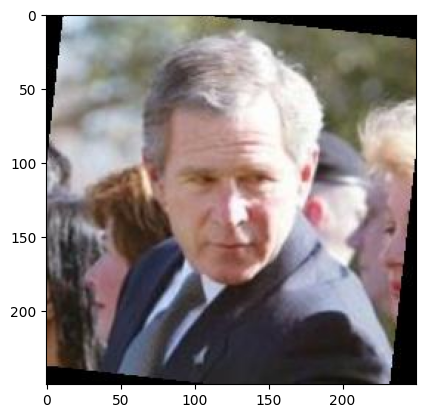

torch.Size([250, 250, 3])


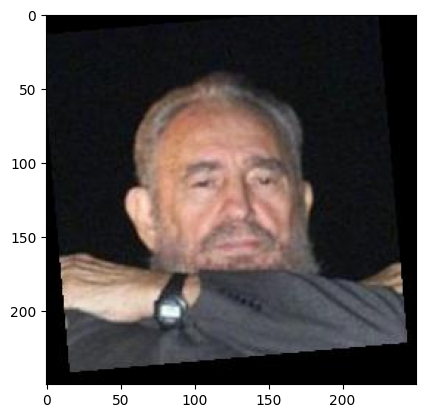

torch.Size([250, 250, 3])


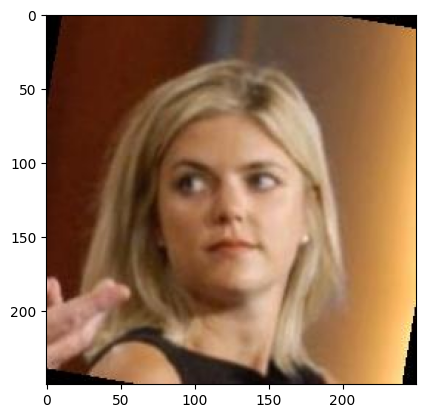

torch.Size([250, 250, 3])


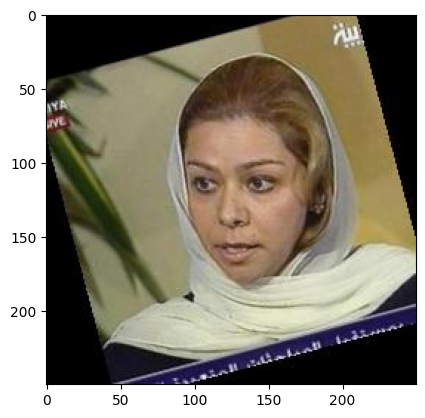

torch.Size([250, 250, 3])


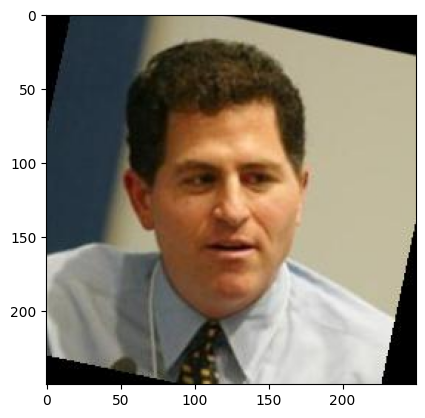

In [7]:
for x,y in dataloader:
    for i in range(x.shape[0]):
        sample = x[i].permute(1, 2, 0)
        print(sample.shape)
        plt.imshow(sample)
        plt.show()
    break




After printing deminison of a batch of data, the repeated 250 are the width and length of the image while the 3 is amount of color channel in the image

# Step 3

Create a new pytorch model calss for your autoencoder. You can use Conv2d, MaxPool2d, BatchNorm2d, ConvTranspose2d and Linear Layers as as well as activation functions. Optionally, you can use UpSample, AveragePool2d and Interpolate2d as well.

**Create seperate functions for the encoder and decoder.**

In [8]:
class AE(nn.Module):

    def __init__(self):
        super(AE,self).__init__()

        ## Define the encoder layers
        # Following lines are encodes, while using Conv2d, MaxPool,and BatchNorm2d
        # Numbers along each modelue is how the deminison of image changed
        self.enc1 = nn.Conv2d(3, 64, 3, padding=1) ## 250 x 250
        self.enc2 = nn.MaxPool2d(2, 2) ## 125 x 125
        self.enc3 = nn.BatchNorm2d(64)
        self.enc4 = nn.Conv2d(64, 128, 3, padding=1) ## 125 x 125
        self.enc5 = nn.MaxPool2d(2, 2) ## 62 x 62
        self.enc6 = nn.BatchNorm2d(128)
        self.enc7 = nn.Conv2d(128, 256, 3, padding=1) ## 62 x 62
        self.enc8 = nn.MaxPool2d(2, 2) ## 31 x 31
        self.enc9 = nn.BatchNorm2d(256)
        ## Define the decoder layers
        # Following lines are decoders, using ConvTransposeand BatchNorm2d
        self.dec1 = nn.ConvTranspose2d(256, 128, 3, stride=2, padding=1, output_padding=1) ## 62 x 62
        self.dec2 = nn.BatchNorm2d(128)
        self.dec3 = nn.ConvTranspose2d(128, 64, 3, stride=2, padding=1, output_padding=1) ## 125 x 125
        self.dec4 = nn.BatchNorm2d(64)
        self.dec5 = nn.ConvTranspose2d(64, 3, 3, stride=2, padding=1, output_padding=1) ## 250 x 250
        self.dec6 = nn.Sigmoid() ## To make the output in range [0, 1]
        # Line above introduce the Sigmoid function to help as a activation function
        ## Define the activation function
        # This line applies a non-linear tranformation to the input
        self.relu = nn.ReLU()

    def encoder(self,x):
        ## Apply the encoder layers and the activation function
        # Calling the encoder def will activate the lines written above
        x = self.relu(self.enc1(x))
        x = self.enc2(x)
        x = self.enc3(x)
        x = self.relu(self.enc4(x))
        x = self.enc5(x)
        x = self.enc6(x)
        x = self.relu(self.enc7(x))
        x = self.enc8(x)
        x = self.enc9(x)
        return x

    def decoder(self,x):
        ## Apply the decoder layers and the activation function
        # Calling the decoder def will activate the lines written above
        x = self.relu(self.dec1(x))
        x = self.dec2(x)
        x = self.relu(self.dec3(x))
        x = self.dec4(x)
        x = self.relu(self.dec5(x))
        x = self.dec6(x)
        return x

    def forward(self,x):
        ## Encode and decode the input
        # Forward the input to actiavte encoder and then decoder def
        x = self.encoder(x)
        x = self.decoder(x)
        return x



The above code is taken from Copillot (preview) on Windows 11. The following question is written

"Using the following code below, create a new pytorch model calss for your autoencoder. You can use Conv2d, MaxPool2d, BatchNorm2d, ConvTranspose2d and Linear Layers as as well as activation functions. Optionally, you can use UpSample, AveragePool2d and Interpolate2d as well. Make sure the decoder comes out the same size before it goes into the encoder. Where it should be size (3,250,250)

Create seperate functions for the encoder and decoder."

Any comment with ## is made by the chat and any comment with # is my own, trying to understand what the code is doing.

There is an issue that is brought about in a later step due to this autoencoder, where somewhere in the decoder the deminision of the image is offset by 2. Therefore, I could not proceed properly to another step.

## Step 4
Create an instance of the class, pass an image to the model, print the shape of the output of the **encoder** and the **decoder**. Check the dimensions and make sure your forward path is working properly.

In [9]:
model = AE()

In [10]:
for x, y in dataloader:
    # Assuming 'x' is your input image tensor
    print("Original deminsion:", x.shape)

    # Passing the image first into the encoder
    # Then pass the encoded image into the decoder
    encoded_output = model.encoder(x)
    decoded_output = model.decoder(encoded_output)

    # Print the deminsions of the encoder and decoder outputs
    print("Encoder deminsions:", encoded_output.shape)
    print("Decoder deminsions:", decoded_output.shape)

    break  # Break after the first iteration

Original deminsion: torch.Size([32, 3, 250, 250])
Encoder deminsions: torch.Size([32, 256, 31, 31])
Decoder deminsions: torch.Size([32, 3, 248, 248])


After the image goes through the encoder, it has seem to increase the color channels and decrease the width and length of the image. But after passing the encoded image into the decoder, it brought the color channel back to the original but the width and length are off by 2.

This is odd as I specificed to Copilot to make sure the deminsions should be the same after the decoder, but seems as though there is a mistake back in the autoencoder. Strange as the comment in one of the decoder lines, "self.dec5", should have given the output the same deminsions, but there may have been something wrong with the math. If I had done more time to debug the issue to get the deminsions to appear correctly, then I would not have issues with the next steps.

##  Step 5
Print total number of parameters in the model, explain what loss function you should use, create an optimizer for training

The following code below is written by Copilot (preview) for Windows 11 and given the permission to search active Microsoft Edge tab. With the permission granted, I wrote the following question

"Can you explain Step 4 a bit"




Code below is a modify version of what the code Copilot gave during the question

"Print total number of parameters in the model"

Rather than having a whole def written in the code box below, I minimized it to two simple lines.

In [11]:
count_parameters = sum(p.numel() for p in model.parameters())
print(count_parameters)

742659


For the optimizer, chat used the Stochastic Grandient Descent with learning rate of 0.01.

In [12]:
optim = torch.optim.SGD(model.parameters(), lr=0.01)

For loss function, chat used the Mean Squared Error, which is a common loss function that minimizes the squared difference between the predicited and target values

In [13]:
loss_function = nn.MSELoss()

##  Step 6
Write a training loop and start trainng the model for several epochs. Report the loss value at the end of each epoch and monitor it. If your loss is not decreasing what do you have to do to troubleshoot it ?

The following code below is written by Copilot (preview) for Windows 11 and given the permission to search active Microsoft Edge tab. With the permission granted, I wrote the following question

"Can you explain Step 5"

Now this is the step where I wrote back in Step 3 that the error would arise due to the decoder but now trying to make this work, it may just be me using the Copilot wrong. Last few steps I used permission to read the active tab, but back in the Step 3, I didn't initially. So I had different numbers for the encoder and decoder. It was after reaching this step, I realized I did not specified the proper deminimsion and rewrote the question for Step 3. So this code had the different deminsion of 28*28 and I just took the line out. In hopes it would run but alas it did not and I'm stuck with error of two different sizes now. At this point, I stop and realized I should have put way more time and effort compared to the other homework assignments. So now I learn, using a chat based program isn't perfect and best to avoid it as possible when dealing with coding


In [14]:
## Define the number of epochs
epochs = 10
## Create a list to store the outputs
outputs = []
## Create a list to store the losses
losses = []
## Loop over the epochs
for epoch in range(epochs):
    ## Loop over the batches
    for (x, _) in dataloader:
        ## Pass the image to the model and get the reconstructed image
        reconstructed = model(x)
        ## Calculate the loss between the image and the reconstructed image
        loss = loss_function(reconstructed, x)
        ## Reset the gradients to zero
        optimizer.zero_grad()
        ## Backpropagate the loss
        loss.backward()
        ## Update the model parameters
        optimizer.step()
        ## Append the loss to the losses list
        losses.append(loss)
        ## Append the epoch, image, and reconstructed image to the outputs list
        outputs.append((epoch, x, reconstructed))

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([32, 3, 250, 250])) that is different to the input size (torch.Size([32, 3, 248, 248])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


RuntimeError: ignored

##  Step 7

Take a random image from the dataset and plot it against the reconstructed (encoded + decoded) image.

In [122]:
plt.imshow()

TypeError: ignored

##  Step 8

In step 7, add a small normaly distrubuted noise to the latent (hidden) representation of the input image and then decode it again. How is adding noise affecting the decoded image ?